1.导入依赖库

In [1]:
#!pip install open3d
#!pip install numpy
#!pip install matplotlib
#!pip install scipy
#!pip install shapely
%config InlineBackend.figure_format = 'svg'
from utils import *




Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2.将.xlsx点云文件转换为.pcd文件并可视化，Excel文件保存在xlsx文件夹，转换后点云保存在pcd文件夹

In [2]:
xlsx_path = './xlsx/'
pcd_path = './pcd/'
excel_to_pcd(xlsx_path, pcd_path)
#visualize_multiple_pcd(pcd_path)


点云文件已保存为: ./pcd/lq1.pcd
点云文件已保存为: ./pcd/lq3.pcd
点云文件已保存为: ./pcd/lq4.pcd
点云文件已保存为: ./pcd/lq5.pcd
点云文件已保存为: ./pcd/lq6.pcd


3.点云配准，配准后点云保存在pcr文件夹

In [3]:
pcr_path = './pcr/'
point_cloud_registration(pcd_path, pcr_path)
#visualize_multiple_pcd(pcr_path)


对齐的点云已保存到 ./pcr/lq1.pcd
对齐的点云已保存到 ./pcr/lq3.pcd
对齐的点云已保存到 ./pcr/lq4.pcd
对齐的点云已保存到 ./pcr/lq5.pcd
对齐的点云已保存到 ./pcr/lq6.pcd


4.点云数据处理,处理后数据位于2d文件夹

In [4]:
#平面位置转换
_2d_path = './2d'
oint_clouds_to2d(pcr_path, _2d_path)
delete_point_1(_2d_path, _2d_path)
delete_point_2(_2d_path, _2d_path, distance_threshold=2.5)
#visualize_multiple_pcd(_2d_path)




处理完成： lq1.pcd
处理完成： lq3.pcd
处理完成： lq4.pcd
处理完成： lq5.pcd
处理完成： lq6.pcd
平面转换完成！
处理完成：  lq1.pcd
处理完成：  lq3.pcd
处理完成：  lq4.pcd
处理完成：  lq5.pcd
处理完成：  lq6.pcd
噪点1删除成功！
处理完成：lq1.pcd, 移除的点数：0
处理完成：lq3.pcd, 移除的点数：0
处理完成：lq4.pcd, 移除的点数：0
处理完成：lq5.pcd, 移除的点数：1
处理完成：lq6.pcd, 移除的点数：0
噪点2删除成功！


5.曲线拟合

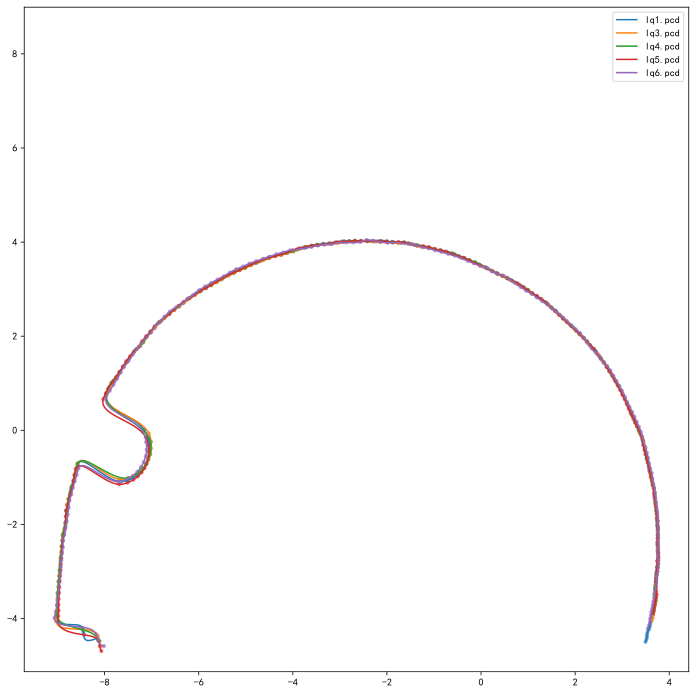

In [5]:
rotation_angle = np.pi*1.51

process_point_clouds(_2d_path, rotation_angle)

6.面积变化对比

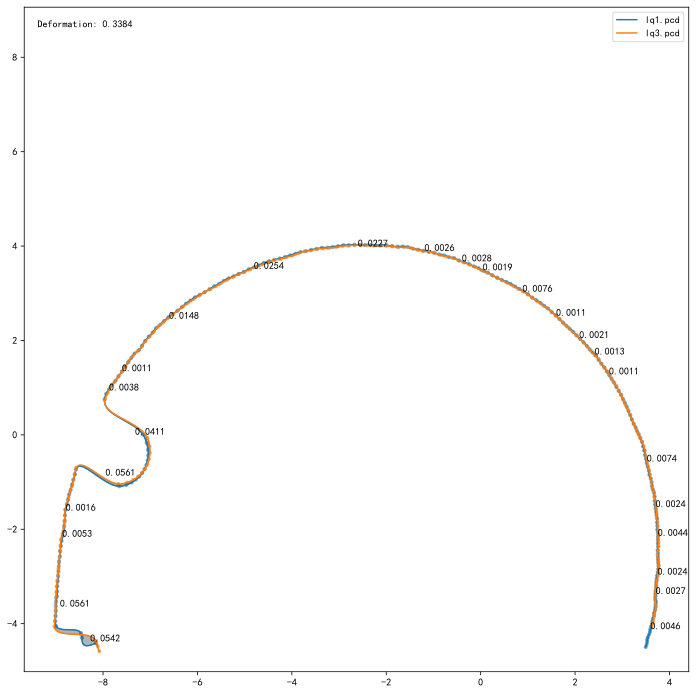

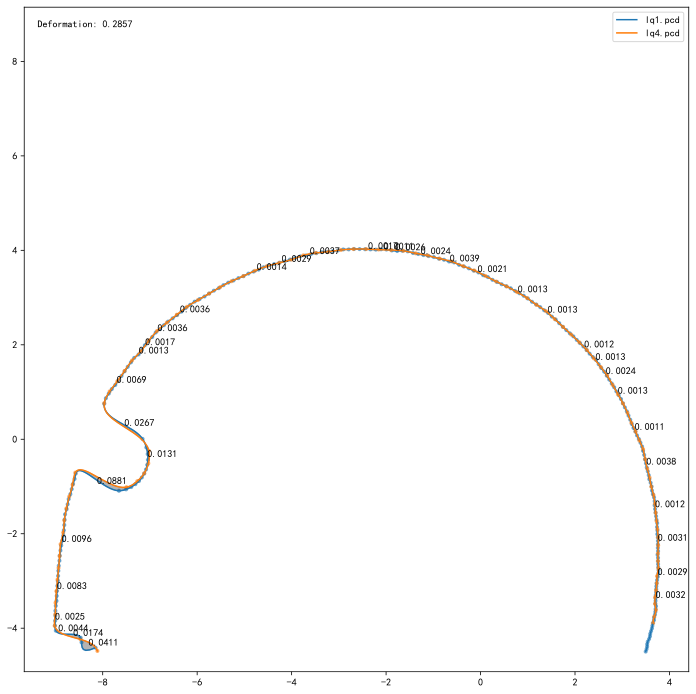

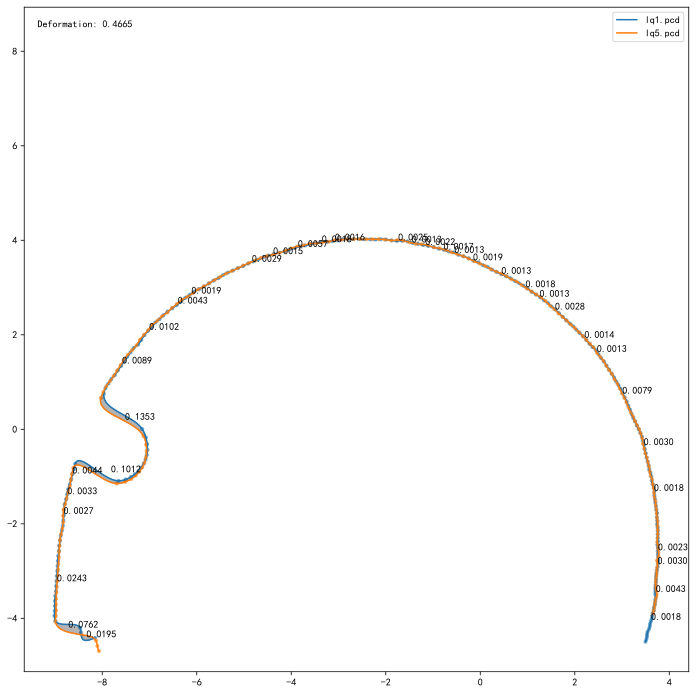

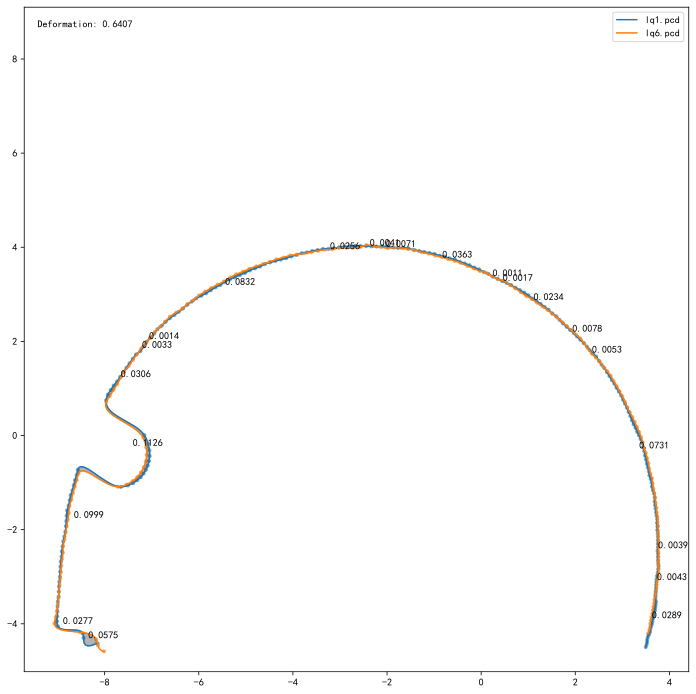

In [6]:
target_file = "lq1.pcd"   # 参考点云名称
input_folder = "./2d"     # 输入文件夹路径
output_folder = "./test"  # 输出文件夹路径
pair_files(input_folder, target_file, output_folder)
for subdir in os.listdir(output_folder):
        subdir_path = os.path.join(output_folder, subdir)
        if os.path.isdir(subdir_path):
            analyze_point_cloud_area(subdir_path, rotation_angle)